<a href="https://colab.research.google.com/github/Ekaterina-Meshkova/BH_HWs/blob/main/HW4%20_v2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [93]:
# Импорт необходимых библиотек
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, ConfusionMatrixDisplay

In [43]:
# Загрузка предварительно подгруженного из kaggle.com датасета
data = pd.read_csv('Smart_Farming_Crop_Yield_2024.csv')

In [44]:
# Вывод первых 5 строк датасета и информации по нему
print('--- Первые 5 строк ---')
print(data.head())
print('--- Info ---')
print(data.info())

--- Первые 5 строк ---
    farm_id       region crop_type  soil_moisture_%  soil_pH  temperature_C  \
0  FARM0001  North India     Wheat            35.95     5.99          17.79   
1  FARM0002    South USA   Soybean            19.74     7.24          30.18   
2  FARM0003    South USA     Wheat            29.32     7.16          27.37   
3  FARM0004  Central USA     Maize            17.33     6.03          33.73   
4  FARM0005  Central USA    Cotton            19.37     5.92          33.86   

   rainfall_mm  humidity_%  sunlight_hours irrigation_type  ... sowing_date  \
0        75.62       77.03            7.27             NaN  ...  2024-01-08   
1        89.91       61.13            5.67       Sprinkler  ...  2024-02-04   
2       265.43       68.87            8.23            Drip  ...  2024-02-03   
3       212.01       70.46            5.03       Sprinkler  ...  2024-02-21   
4       269.09       55.73            7.93             NaN  ...  2024-02-05   

   harvest_date total_days 

In [45]:
# Проверка датасета на пропущенные значения
print ('Пропущенные значения до обработки:')
print (data.isnull().sum())

# Следует заполнить пустые строки irrigation_type и crop_disease_status

Пропущенные значения до обработки:
farm_id                   0
region                    0
crop_type                 0
soil_moisture_%           0
soil_pH                   0
temperature_C             0
rainfall_mm               0
humidity_%                0
sunlight_hours            0
irrigation_type         150
fertilizer_type           0
pesticide_usage_ml        0
sowing_date               0
harvest_date              0
total_days                0
yield_kg_per_hectare      0
sensor_id                 0
timestamp                 0
latitude                  0
longitude                 0
NDVI_index                0
crop_disease_status     130
dtype: int64


In [46]:
# Заполнение пропущенных значений (числовые заполняются средним значением, категориальные - модой)
for col in data:
  data[col] = data[col].fillna(data[col].mean() if data[col].dtype in ['int64', 'float64'] else data[col].mode()[0])

In [47]:
# Проверка на пропущенные значения после из обработки
print ('Пропущенные значения после обработки:')
print (data.isnull().sum())

Пропущенные значения после обработки:
farm_id                 0
region                  0
crop_type               0
soil_moisture_%         0
soil_pH                 0
temperature_C           0
rainfall_mm             0
humidity_%              0
sunlight_hours          0
irrigation_type         0
fertilizer_type         0
pesticide_usage_ml      0
sowing_date             0
harvest_date            0
total_days              0
yield_kg_per_hectare    0
sensor_id               0
timestamp               0
latitude                0
longitude               0
NDVI_index              0
crop_disease_status     0
dtype: int64


In [48]:
from sklearn.preprocessing import LabelEncoder

# Кодирование категориальных признаков
label_encoders = {}
categorical_cols = ['farm_id', 'region', 'crop_type', 'irrigation_type', 'fertilizer_type', 'sowing_date', 'harvest_date', 'sensor_id', 'timestamp', 'crop_disease_status']
for col in categorical_cols:
  le = LabelEncoder()
  data[col] = le.fit_transform(data[col].astype(str))
  label_encoders[col] = le

In [50]:
# Проверка dtype после обработки данных
print('--- Info ---')
print(data.info())

--- Info ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   farm_id               500 non-null    int64  
 1   region                500 non-null    int64  
 2   crop_type             500 non-null    int64  
 3   soil_moisture_%       500 non-null    float64
 4   soil_pH               500 non-null    float64
 5   temperature_C         500 non-null    float64
 6   rainfall_mm           500 non-null    float64
 7   humidity_%            500 non-null    float64
 8   sunlight_hours        500 non-null    float64
 9   irrigation_type       500 non-null    int64  
 10  fertilizer_type       500 non-null    int64  
 11  pesticide_usage_ml    500 non-null    float64
 12  sowing_date           500 non-null    int64  
 13  harvest_date          500 non-null    int64  
 14  total_days            500 non-null    int64  
 15  yield_kg_p

In [23]:
# Статистический обзор датасета перед обучением
print(data.describe())

          farm_id      region   crop_type  soil_moisture_%     soil_pH  \
count  500.000000  500.000000  500.000000       500.000000  500.000000   
mean   249.500000    1.908000    1.934000        26.750140    6.523980   
std    144.481833    1.419707    1.424677        10.150053    0.585558   
min      0.000000    0.000000    0.000000        10.160000    5.510000   
25%    124.750000    1.000000    1.000000        17.890000    6.030000   
50%    249.500000    2.000000    2.000000        25.855000    6.530000   
75%    374.250000    3.000000    3.000000        36.022500    7.040000   
max    499.000000    4.000000    4.000000        44.980000    7.500000   

       temperature_C  rainfall_mm  humidity_%  sunlight_hours  \
count     500.000000   500.000000  500.000000       500.00000   
mean       24.675740   181.685740   65.194460         7.03014   
std         5.348899    72.293091   14.642849         1.69167   
min        15.000000    50.170000   40.230000         4.01000   
25%     

In [29]:
# Разделение данных на признаки (X) и целевую переменную (y)
X = data.drop('crop_disease_status', axis=1)
y = data['crop_disease_status'].astype(int)

In [30]:
# Разделение на обучающую и тестовую выборки
X_train, X_test, y_train, y_test = train_test_split (X,y,test_size=0.3,random_state=42, stratify=y)

In [90]:
# 1 Linear Discriminant Analysis (Линейный дискриминантный анализ):

from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

# Создание и обучение модели LDA
lda = LinearDiscriminantAnalysis()
X_train_lda = lda.fit_transform(X_train, y_train)
X_test_lda = lda.transform(X_test)

# Прогнозирование на тестовом наборе данных
y_pred_lda = lda.predict(X_test)

# Оценка качества модели
lda_accuracy = accuracy_score(y_test, y_pred_lda)
lda_matrix = confusion_matrix(y_test, y_pred_lda)
lda_report = classification_report(y_test, y_pred_lda)

print("Accuracy:", lda_accuracy)
print("Confusion Matrix:\n", lda_matrix)
print("Classification Report:\n", lda_report)

Accuracy: 0.935672514619883
Confusion Matrix:
 [[ 54  10]
 [  1 106]]
Classification Report:
               precision    recall  f1-score   support

           0       0.98      0.84      0.91        64
           1       0.91      0.99      0.95       107

    accuracy                           0.94       171
   macro avg       0.95      0.92      0.93       171
weighted avg       0.94      0.94      0.93       171



In [88]:
# 2 Ridge Classifier:

from sklearn.linear_model import RidgeClassifier

# Создание и обучение модели LDA
rc = RidgeClassifier()

# Обучение GridSearchCV на обучающих данных
rc.fit(X_train, y_train)

# Прогнозирование на тестовом наборе данных с использованием лучшей модели
y_pred_rc = rc.predict(X_test)

# Оценка качества модели
rc_accuracy = accuracy_score(y_test, y_pred_rc)
rc_matrix = confusion_matrix(y_test, y_pred_rc)
rc_report = classification_report(y_test, y_pred_rc)

print("Accuracy:", rc_accuracy)
print("Confusion Matrix:\n", rc_matrix)
print("Classification Report:\n", rc_report)

Accuracy: 0.9473684210526315
Confusion Matrix:
 [[ 55   9]
 [  0 107]]
Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.86      0.92        64
           1       0.92      1.00      0.96       107

    accuracy                           0.95       171
   macro avg       0.96      0.93      0.94       171
weighted avg       0.95      0.95      0.95       171



In [91]:
# 3 Gradient Boosting Classifier:

from sklearn.ensemble import GradientBoostingClassifier

# Создание модели Gradient Boosting Classifier
gb = GradientBoostingClassifier(n_estimators=100, max_depth=3, learning_rate=0.1, random_state=42)

# Обучение модели на обучающем наборе данных
gb.fit(X_train, y_train)

# Прогнозирование на тестовом наборе данных
y_pred_gb = gb_classifier.predict(X_test)

# Оценка качества модели
gb_accuracy = accuracy_score(y_test, y_pred_gb)
gb_matrix = confusion_matrix(y_test, y_pred_gb)
gb_report = classification_report(y_test, y_pred_gb)

print("Accuracy:", gb_accuracy)
print("Confusion Matrix:\n", gb_matrix)
print("Classification Report:\n", gb_report)

Accuracy: 0.9707602339181286
Confusion Matrix:
 [[ 60   4]
 [  1 106]]
Classification Report:
               precision    recall  f1-score   support

           0       0.98      0.94      0.96        64
           1       0.96      0.99      0.98       107

    accuracy                           0.97       171
   macro avg       0.97      0.96      0.97       171
weighted avg       0.97      0.97      0.97       171



In [62]:
!pip install catboost
import catboost

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 99.2/99.2 MB 6.7 MB/s eta 0:00:00


In [85]:
# 4 Cat Boost Classifier:

from catboost import CatBoostClassifier

# Создание модели CatBoostClassifier
cb = CatBoostClassifier(iterations=50, depth=10, learning_rate=0.2, loss_function='MultiClass', random_state=42)

# Обучение модели на обучающем наборе данных
cb.fit(X_train, y_train)

# Прогнозирование на тестовом наборе данных
y_pred_cb = clf.predict(X_test)

# Оценка качества модели
cb_accuracy = accuracy_score(y_test, y_pred_cb)
cb_matrix = confusion_matrix(y_test, y_pred_cb)
cb_report = classification_report(y_test, y_pred_cb)

print("Accuracy:", cb_accuracy)
print("Confusion Matrix:\n", cb_matrix)
print("Classification Report:\n", cb_report)

0:	learn: 0.5815383	total: 279ms	remaining: 13.7s
1:	learn: 0.5099925	total: 576ms	remaining: 13.8s
2:	learn: 0.4477414	total: 850ms	remaining: 13.3s
3:	learn: 0.3956062	total: 1.13s	remaining: 12.9s
4:	learn: 0.3490781	total: 1.43s	remaining: 12.8s
5:	learn: 0.3140303	total: 1.76s	remaining: 12.9s
6:	learn: 0.2817893	total: 2.15s	remaining: 13.2s
7:	learn: 0.2539762	total: 2.55s	remaining: 13.4s
8:	learn: 0.2310255	total: 2.91s	remaining: 13.3s
9:	learn: 0.2160355	total: 3.31s	remaining: 13.2s
10:	learn: 0.2012459	total: 3.7s	remaining: 13.1s
11:	learn: 0.1893513	total: 4.54s	remaining: 14.4s
12:	learn: 0.1777384	total: 5.08s	remaining: 14.5s
13:	learn: 0.1648316	total: 5.43s	remaining: 14s
14:	learn: 0.1515590	total: 5.75s	remaining: 13.4s
15:	learn: 0.1441153	total: 6.09s	remaining: 12.9s
16:	learn: 0.1372198	total: 6.43s	remaining: 12.5s
17:	learn: 0.1279729	total: 6.84s	remaining: 12.2s
18:	learn: 0.1220003	total: 7.42s	remaining: 12.1s
19:	learn: 0.1158966	total: 7.97s	remaining:

In [83]:
# 5 Extra Trees Classifier:

from sklearn.ensemble import ExtraTreesClassifier

# Создание модели Extra Trees Classifier
et = ExtraTreesClassifier(n_estimators=200, random_state=42)

# Обучение модели Extra Trees Classifier на обучающем наборе данных
et.fit(X_train, y_train)

# Прогнозирование на тестовом наборе данных
y_pred_et = et.predict(X_test)

# Оценка качества модели
et_accuracy = accuracy_score(y_test, y_pred_et)
et_matrix = confusion_matrix(y_test, y_pred_et)
et_report = classification_report(y_test, y_pred_et)

print("Accuracy:", et_accuracy)
print("Confusion Matrix:\n", et_matrix)
print("Classification Report:\n", et_report)

Accuracy: 0.9707602339181286
Confusion Matrix:
 [[ 60   4]
 [  1 106]]
Classification Report:
               precision    recall  f1-score   support

           0       0.98      0.94      0.96        64
           1       0.96      0.99      0.98       107

    accuracy                           0.97       171
   macro avg       0.97      0.96      0.97       171
weighted avg       0.97      0.97      0.97       171



In [84]:
# 6 QDA (Квадратичный дискриминантный анализ):

from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis

# Создание классификатора QDA
qd = QuadraticDiscriminantAnalysis()

# Обучение классификатора QDA  на обучающем наборе данных
qd.fit(X_train, y_train)

# Прогнозирование на тестовом наборе данных
y_pred_qd = qd.predict(X_test)

# Оценка качества модели
qd_accuracy = accuracy_score(y_test, y_pred_qd)
qd_matrix = confusion_matrix(y_test, y_pred_qd)
qd_report = classification_report(y_test, y_pred_qd)

print("Accuracy:", qd_accuracy)
print("Confusion Matrix:\n", qd_matrix)
print("Classification Report:\n", qd_report)

Accuracy: 0.9473684210526315
Confusion Matrix:
 [[ 61   3]
 [  6 101]]
Classification Report:
               precision    recall  f1-score   support

           0       0.91      0.95      0.93        64
           1       0.97      0.94      0.96       107

    accuracy                           0.95       171
   macro avg       0.94      0.95      0.94       171
weighted avg       0.95      0.95      0.95       171



/usr/local/lib/python3.11/dist-packages/sklearn/discriminant_analysis.py:1024: LinAlgWarning: The covariance matrix of class 0 is not full rank. Increasing the value of parameter `reg_param` might help reducing the collinearity.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/discriminant_analysis.py:1024: LinAlgWarning: The covariance matrix of class 1 is not full rank. Increasing the value of parameter `reg_param` might help reducing the collinearity.
  warnings.warn(


In [82]:
# 7 Random Forest (Случайный лес, Bagging):

from sklearn.ensemble import RandomForestClassifier

# Создание модели Random Forest
rf = RandomForestClassifier(n_estimators=100, random_state=42)

# Обучение модели Random Forest на обучающем наборе данных
rf.fit(X_train, y_train)

# Прогнозирование на тестовом наборе данных
y_pred_rf = rf.predict(X_test)

# Оценка качества модели
rf_accuracy = accuracy_score(y_test, y_pred_rf)
rf_matrix = confusion_matrix(y_test, y_pred_rf)
rf_report = classification_report(y_test, y_pred_rf)

print("Accuracy:", rf_accuracy)
print("Confusion Matrix:\n", rf_matrix)
print("Classification Report:\n", rf_report)

Accuracy: 0.935672514619883
Confusion Matrix:
 [[ 58   6]
 [  5 102]]
Classification Report:
               precision    recall  f1-score   support

           0       0.92      0.91      0.91        64
           1       0.94      0.95      0.95       107

    accuracy                           0.94       171
   macro avg       0.93      0.93      0.93       171
weighted avg       0.94      0.94      0.94       171



In [81]:
# 8 XGBoost (Boosting):

from xgboost import XGBClassifier

# Создание XGB модели
xgb = XGBClassifier(use_label_encoder=False, eval_metric='logloss')

# Обучение модели XGB на обучающем наборе данных
xgb.fit(X_train, y_train)

# Прогнозирование на тестовом наборе данных
y_pred_xgb = xgb.predict(X_test)

# Оценка качества модели
xgb_accuracy = accuracy_score(y_test, y_pred_xgb)
xgb_matrix = confusion_matrix(y_test, y_pred_xgb)
xgb_report = classification_report(y_test, y_pred_xgb)

print("Accuracy:", xgb_accuracy)
print("Confusion Matrix:\n", xgb_matrix)
print("Classification Report:\n", xgb_report)

Accuracy: 0.9649122807017544
Confusion Matrix:
 [[ 60   4]
 [  2 105]]
Classification Report:
               precision    recall  f1-score   support

           0       0.97      0.94      0.95        64
           1       0.96      0.98      0.97       107

    accuracy                           0.96       171
   macro avg       0.97      0.96      0.96       171
weighted avg       0.96      0.96      0.96       171



/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [16:31:24] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


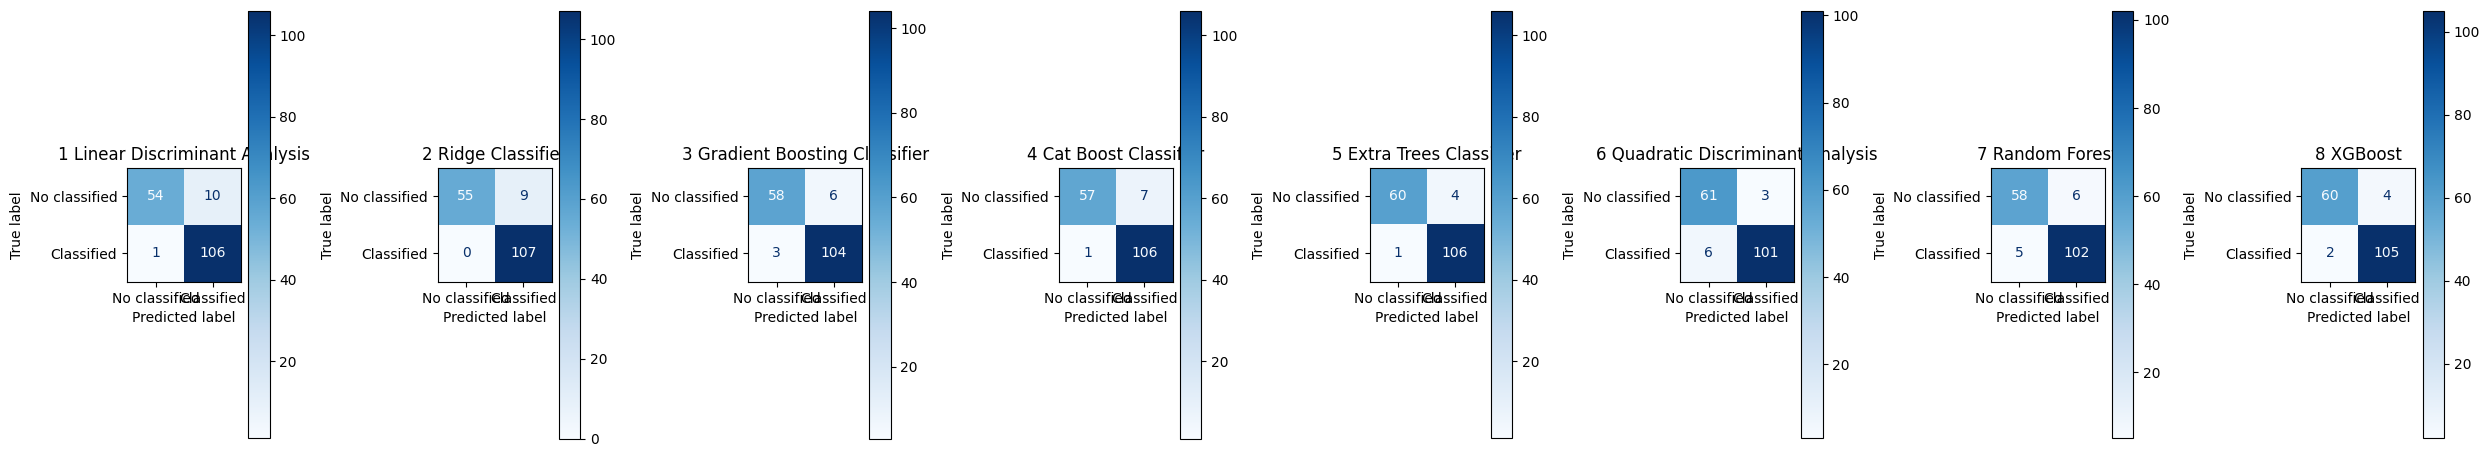

In [96]:
# Матрица ошибок всех классификаторов:

fig, axes = plt.subplots(1, 8, figsize=(25, 10))

models = [('1 Linear Discriminant Analysis', lda), ('2 Ridge Classifier', rc),
          ('3 Gradient Boosting Classifier', gb), ('4 Cat Boost Classifier',cb), ('5 Extra Trees Classifier',et),
          ('6 Quadratic Discriminant Analysis',qd), ('7 Random Forest',rf), ('8 XGBoost',xgb)]
for i, (name, model) in enumerate(models):
    y_pred = model.predict(X_test)
    cm = confusion_matrix(y_test, y_pred)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['No classified', 'Classified'])
    disp.plot(ax=axes[i], cmap='Blues')
    axes[i].set_title(f'{name}')

plt.tight_layout()
plt.show()

In [99]:
# Вывод метрик всех классификаторов:
print("1 Linear Discriminant Analysis:")
print("Accuracy:", lda_accuracy)
print(lda_report)
print("\n" + "="*50 + "\n")
print("2 Ridge Classifier:")
print("Accuracy:", rc_accuracy)
print(rc_report)
print("\n" + "="*50 + "\n")
print("3 Gradient Boosting Classifier:")
print("Accuracy:", gb_accuracy)
print(gb_report)
print("\n" + "="*50 + "\n")
print("4 Cat Boost Classifier:")
print("Accuracy:", cbc_accuracy)
print(cbc_report)
print("\n" + "="*50 + "\n")
print("5 Extra Trees Classifier:")
print("Accuracy:", et_accuracy)
print(et_report)
print("\n" + "="*50 + "\n")
print("6 Quadratic Discriminant Analysis:")
print("Accuracy:", qd_accuracy)
print(qd_report)
print("\n" + "="*50 + "\n")
print("7 Random Forest:")
print("Accuracy:", rf_accuracy)
print(rf_report)
print("\n" + "="*50 + "\n")
print("8 XGBoost:")
print("Accuracy:", xgb_accuracy)
print(xgb_report)
print("\n" + "="*50 + "\n")

1 Linear Discriminant Analysis:
Accuracy: 0.935672514619883
              precision    recall  f1-score   support

           0       0.98      0.84      0.91        64
           1       0.91      0.99      0.95       107

    accuracy                           0.94       171
   macro avg       0.95      0.92      0.93       171
weighted avg       0.94      0.94      0.93       171



2 Ridge Classifier:
Accuracy: 0.9473684210526315
              precision    recall  f1-score   support

           0       1.00      0.86      0.92        64
           1       0.92      1.00      0.96       107

    accuracy                           0.95       171
   macro avg       0.96      0.93      0.94       171
weighted avg       0.95      0.95      0.95       171



3 Gradient Boosting Classifier:
Accuracy: 0.9707602339181286
              precision    recall  f1-score   support

           0       0.98      0.94      0.96        64
           1       0.96      0.99      0.98       107

    accu